# Study of FER2013 dataset

## Initializing and importing libraries

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages.
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
import pandas as pd
import cv2

In [3]:
# Check Python and packages' version.
!python3 --version
print("numpy: "+np.__version__)
print("pandas: "+pd.__version__)
print("cv2: "+cv2.__version__)

Python 3.10.12
numpy: 1.22.4
pandas: 1.5.3
cv2: 4.7.0


## Import dataset

In [6]:
# Point at the directory where the dataset is
%cd /content/drive/MyDrive/TFG_FER/Datasets_and_packages
fer2013 = 'fer2013.csv'

/content/drive/MyDrive/TFG_FER/Datasets_and_packages


## Analysis of dataset

In [7]:
# Print dataset to view csv organization.
emotion_mapping = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
columns=['emotion','pixels','usage']
dataframe=pd.read_csv(fer2013,names=columns, na_filter=False)
image=dataframe['pixels']
dataframe.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [8]:
# Check data shape.
dataframe1 = pd.read_csv(fer2013)
dataframe1.shape
dataframe1.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [23]:
# Check dataset distribution.
target_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
label_counts = dataframe1['emotion'].value_counts(sort=False).reset_index()
label_counts.columns = ['index', 'number']
label_counts['emotion'] = label_counts['index'].map(target_map)
label_counts = label_counts.sort_values(by='index').reset_index(drop=True)
label_counts = label_counts.drop('index', axis=1)

# Print the dataframe
label_counts


,number,emotion
0,4953,Angry
1,547,Disgust
2,5121,Fear
3,8989,Happy
4,6077,Sad
5,4002,Surprise
6,6198,Neutral


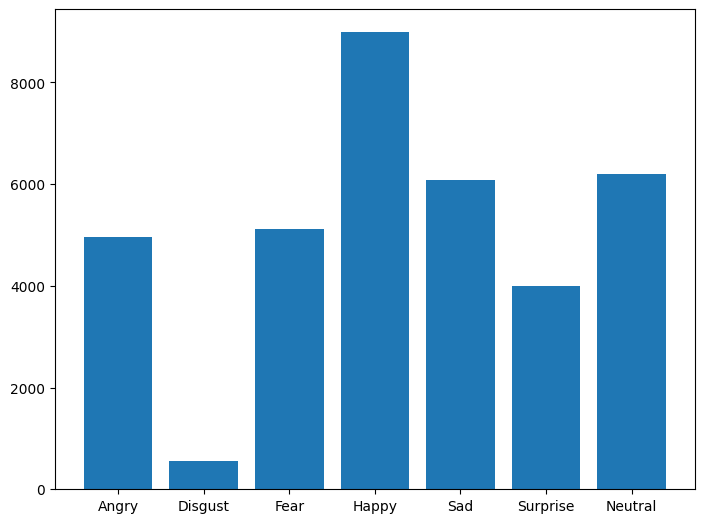

In [24]:
# Plot the bar graph of the number of images for each emotion.
import matplotlib.pyplot as plt
figure = plt.figure()
axis = figure.add_axes([0,0,1,1])
emotion = label_counts['emotion']
total_num = label_counts['number']

# Create bars with different colors
plt.bar(emotion, total_num)


# Show graph
plt.show()

<ipython-input-25-3c4807f0b463>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([imag.astype(np.uint8), emtn])


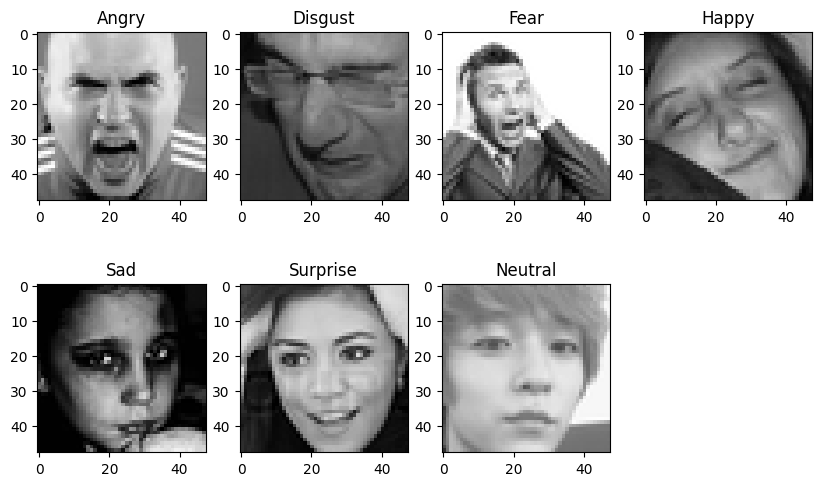

In [25]:
# Plot images from dataset.

def row2image(row):
    pxl, emtn = row['pixels'], target_map[row['emotion']]
    _img_ = np.array(pxl.split())
    _img_ = _img_.reshape(48,48)
    imag = np.zeros((48,48,3))
    imag[:,:,0] = _img_
    imag[:,:,1] = _img_
    imag[:,:,2] = _img_
    return np.array([imag.astype(np.uint8), emtn])

plt.figure(0, figsize=(10,6))
for i in range(1,8):
    faces = dataframe1[dataframe1['emotion'] == i-1].iloc[3]
    _img_ = row2image(faces)
    plt.subplot(2,4,i)
    plt.imshow(_img_[0])
    plt.title(_img_[1])

plt.show() 

# Study of FER2013 PLUS dataset

## Import dataset

In [30]:
# Point at the directory where the dataset is
%cd /content/drive/MyDrive/TFG_FER/Datasets_and_packages
fer2013 = 'fer2013plus.csv'

/content/drive/MyDrive/TFG_FER/Datasets_and_packages


## Analysis of dataset

In [31]:
# Print dataset to view csv organization.
emotion_mapping = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
columns=['emotion','pixels','usage']
dataframe=pd.read_csv(fer2013,names=columns, na_filter=False)
image=dataframe['pixels']
dataframe.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,6,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,6,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,6,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,6,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,6,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [32]:
# Check data shape.
dataframe1 = pd.read_csv(fer2013)
dataframe1.shape
dataframe1.Usage.value_counts()

Training       28224
PublicTest      3529
PrivateTest     3519
Name: Usage, dtype: int64

In [33]:
# Check dataset distribution.
target_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
label_counts = dataframe1['emotion'].value_counts(sort=False).reset_index()
label_counts.columns = ['index', 'number']
label_counts['emotion'] = label_counts['index'].map(target_map)
label_counts = label_counts.sort_values(by='index').reset_index(drop=True)
label_counts = label_counts.drop('index', axis=1)

# Print the dataframe
label_counts


,number,emotion
0,3111,Angry
1,248,Disgust
2,819,Fear
3,9355,Happy
4,4371,Sad
5,4462,Surprise
6,12906,Neutral


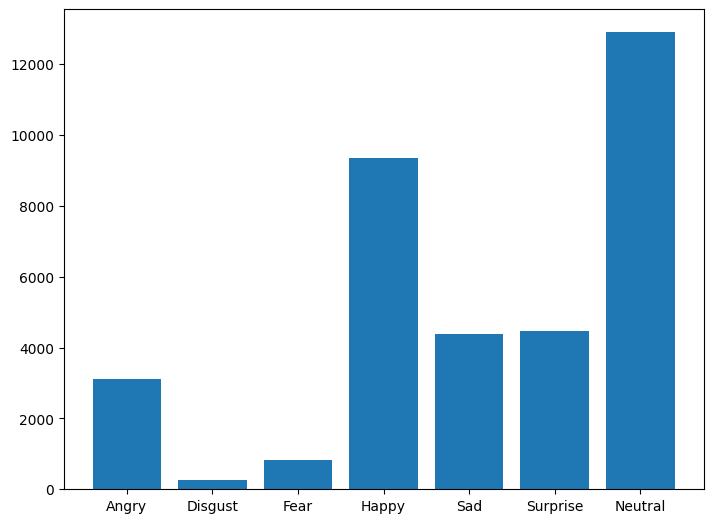

In [34]:
# Plot the bar graph of the number of images for each emotion.
import matplotlib.pyplot as plt
figure = plt.figure()
axis = figure.add_axes([0,0,1,1])
emotion = label_counts['emotion']
total_num = label_counts['number']

# Create bars with different colors
plt.bar(emotion, total_num)


# Show graph
plt.show()

##**Bibliography:**

*   https://github.com/tuhinaprasad28/Comprehending-people-responses-through-Facial-Expression/blob/main/Facial_Expression_Final.ipynb 